In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tqdm as tqdm
import numpy as np
import matplotlib.pyplot as plt

from windspeed import *

In [3]:
count = 2000
high_windspeed = mean_high_wind_dates(count)

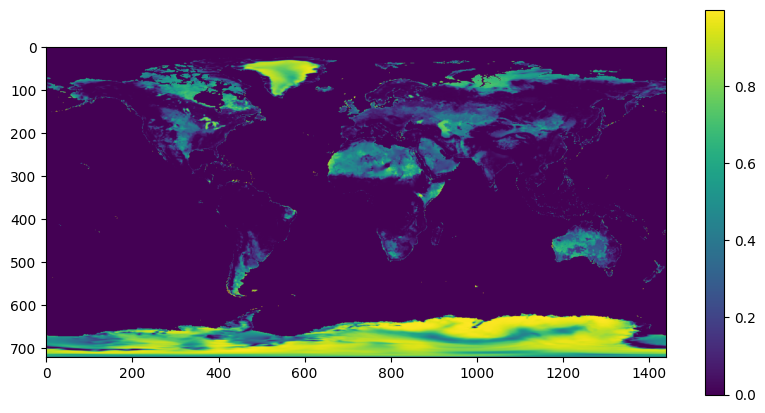

In [4]:
plt.figure(figsize=(10, 5))
plt.imshow(high_windspeed)
plt.colorbar()

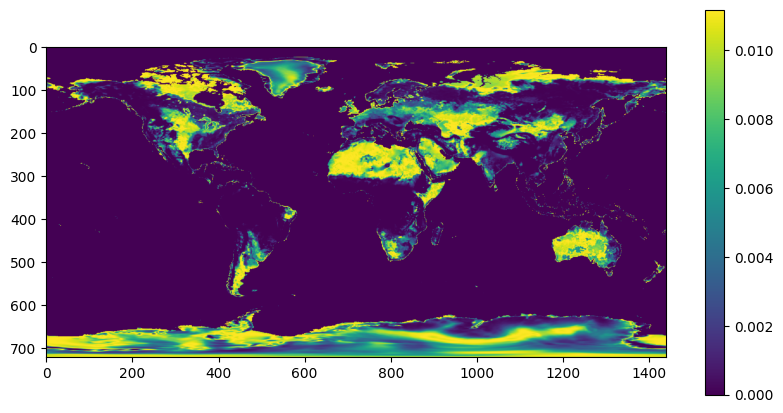

In [5]:
plt.figure(figsize=(10, 5))
plt.imshow(high_windspeed * (1 - high_windspeed) / np.sqrt(count) * 2)
plt.colorbar()